In [7]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [9]:
import sys
print(sys.executable)
print(sys.version)



C:\ProgramData\anaconda3\python.exe
3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


In [11]:
import sys
sys.path.append(r"C:\Users\sanja\AppData\Roaming\Python\Python312\site-packages")
import tensorflow as tf
print(tf.__version__)

2.18.0


In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [15]:
data_train_path = r"D:\image classification\test"

data_val_path = r"D:\image classification\validation"

In [17]:
img_width = 180
img_height =180 

In [19]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 36 classes.


In [21]:
data_cat = data_train.class_names

In [23]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [25]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [27]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


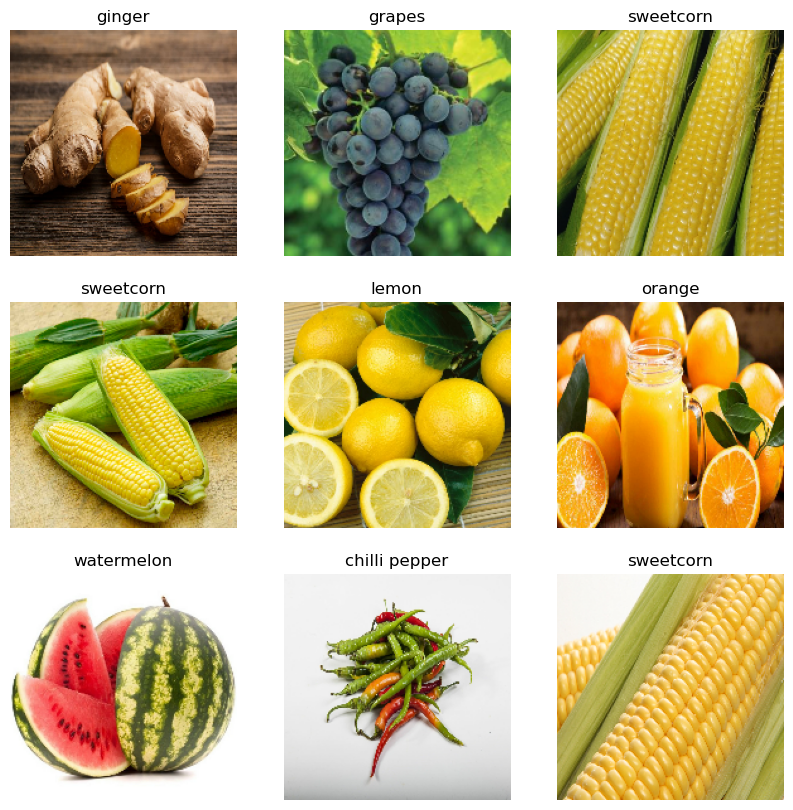

In [29]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [31]:
from tensorflow.keras.models import Sequential

In [33]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [63]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [65]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [67]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 966ms/step - accuracy: 0.0448 - loss: 5.2006 - val_accuracy: 0.1254 - val_loss: 3.5167
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 892ms/step - accuracy: 0.0654 - loss: 3.4809 - val_accuracy: 0.1254 - val_loss: 3.1710
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 930ms/step - accuracy: 0.1383 - loss: 3.1252 - val_accuracy: 0.3932 - val_loss: 2.7122
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 884ms/step - accuracy: 0.2642 - loss: 2.7541 - val_accuracy: 0.5954 - val_loss: 2.0908
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5199 - loss: 2.1222 - val_accuracy: 0.7493 - val_loss: 1.2172
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 906ms/step - accuracy: 0.6829 - loss: 1.4600 - val_accuracy: 0.8462 - val_loss: 0.7704
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 933ms/step - accuracy: 0.8087 - loss: 0.8017 - val_accuracy: 0.9060 - val_loss: 0.5248
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 855ms/step - accuracy: 0.8735 - loss: 0.5950 - val_accurac

Text(0.5, 1.0, 'Loss')

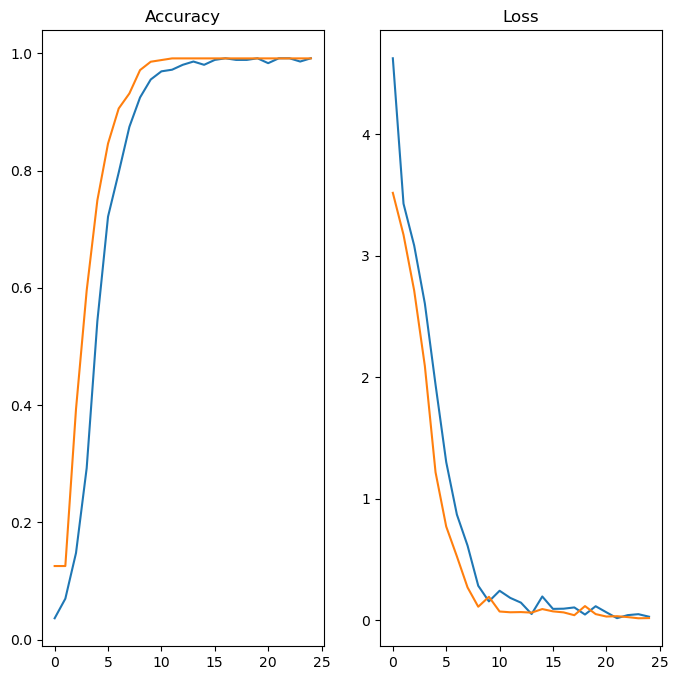

In [69]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [71]:
image = r"D:\image classification\corn.jpg"
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [73]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


In [75]:
score = tf.nn.softmax(predict)

In [77]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 72.84


In [79]:
model.save('Image_classify.keras')

In [81]:
model.save("D:\\image classification\\Image_classify (1).keras")
